In [1]:
import joblib
import numpy as np
import pandas as pd

In [2]:
ruta_csv = '/content/drive/MyDrive/Datos_TFG_HP/Datos_finales/Modelo/7_datos_con_cuarto/0021500216_final.csv'
df = pd.read_csv(ruta_csv)

In [3]:
y_real = df['clase'].copy()

In [4]:
info_temporal = df[['PERIOD', 'game_clock_1']].copy()

In [5]:
X_nuevo = df.drop(columns=['clase', 'PERIOD', 'event_id'], errors='ignore')

In [6]:
#Se carga modelo entrenado
modelo = joblib.load('/content/drive/MyDrive/Datos_TFG_HP/Datos_finales/Modelo/best_xgb_model.joblib')

In [7]:
y_pred = modelo.predict(X_nuevo.values)

In [8]:
print("Primeras predicciones:")
for i in range(min(10, len(y_pred))):
    print(f"Jugada {i+1}: Clase predicha - {y_pred[i]} (real: {y_real.iloc[i]})")

Primeras predicciones:
Jugada 1: Clase predicha - 0 (real: 1)
Jugada 2: Clase predicha - 0 (real: 0)
Jugada 3: Clase predicha - 0 (real: 0)
Jugada 4: Clase predicha - 0 (real: 0)
Jugada 5: Clase predicha - 2 (real: 2)
Jugada 6: Clase predicha - 2 (real: 2)
Jugada 7: Clase predicha - 2 (real: 2)
Jugada 8: Clase predicha - 2 (real: 1)
Jugada 9: Clase predicha - 2 (real: 2)
Jugada 10: Clase predicha - 1 (real: 1)


In [9]:
df_resultado = pd.DataFrame({
    'PERIOD': info_temporal['PERIOD'],
    'game_clock': info_temporal['game_clock_1'],
    'clase_real': y_real,
    'clase_predicha': y_pred
})



Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.7222    0.6500    0.6842        20
           1     0.8966    0.8387    0.8667        31
           2     0.9392    0.9521    0.9456       146
           3     0.5455    0.6667    0.6000         9

    accuracy                         0.8932       206
   macro avg     0.7759    0.7769    0.7741       206
weighted avg     0.8945    0.8932    0.8932       206

Accuracy total: 0.8932

Matriz de Confusión:
        Pred 0  Pred 1  Pred 2  Pred 3
Real 0      13       0       5       2
Real 1       2      26       3       0
Real 2       2       2     139       3
Real 3       1       1       1       6


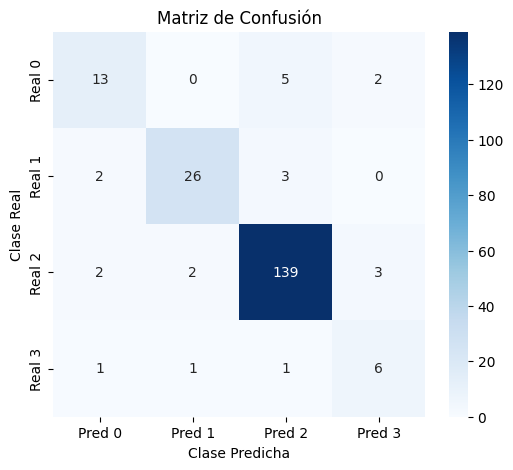

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


print("\nReporte de clasificación:")
print(classification_report(df_resultado['clase_real'], df_resultado['clase_predicha'], digits=4))

accuracy = accuracy_score(df_resultado['clase_real'], df_resultado['clase_predicha'])
print(f"Accuracy total: {accuracy:.4f}")

cm = confusion_matrix(df_resultado['clase_real'], df_resultado['clase_predicha'])

df_cm = pd.DataFrame(cm,
                     index=[f"Real {i}" for i in np.unique(y_real)],
                     columns=[f"Pred {i}" for i in np.unique(y_real)])
print("\nMatriz de Confusión:")
print(df_cm)

plt.figure(figsize=(6, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

In [11]:
print("\nResumen de clases predichas:")
print(df_resultado['clase_predicha'].value_counts().sort_index())


Resumen de clases predichas:
clase_predicha
0     18
1     29
2    148
3     11
Name: count, dtype: int64


In [12]:
mapeo_clases = {
    0: "Jugada no relevante",
    1: "Tiro anotado",
    2: "Tiro fallado con rebote",
    3: "Cambio de posesión"
}


def convertir_shotclock(segundos):
    segundos_ajustados = max(0, segundos - 3)
    minutos = int(segundos_ajustados // 60)
    segundos = int(segundos_ajustados % 60)
    return f"{minutos}:{segundos:02d}"

df_csv = pd.DataFrame({
    "Id": range(1, len(df_resultado) + 1),
    "Tipo de jugada": df_resultado["clase_predicha"].map(mapeo_clases),
    "Minuto": df_resultado["game_clock"].apply(convertir_shotclock),
    "Cuarto": df_resultado["PERIOD"]
})

df_csv.to_csv("jugadas_predichas.csv", index=False)
print("Archivo 'jugadas_predichas.csv' creado correctamente.")


Archivo 'jugadas_predichas.csv' creado correctamente.
